# **Modelo lineales**

**Regresión Lineal**

Es un modelo que busca ajustar a un evento **continuo, una línea recta** de manera que se ajuste la mejor forma a la nube de puntos.

**Fórmula de la recta:**

image.png

**Ruido gaussiano**

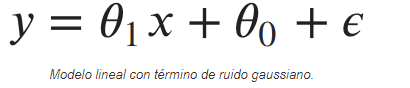

El objetivo del modelo es encontrar los parámteros m y b que mejor se ajustan a la nube de puntos.

Se genera unos datos que siguen una línea recta, y le añadiremos ruido gaussiano.

La fórmula utilizada para generar los datos es:

                              y = 0.1x + 1.25 + N(0.02)




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
def f(x): 
  np.random.seed(42) 
  y = 0.1*x + 1.25 +0.2*np.random.randn(x.shape[0])
  return y

x = np.arange(0,20,0.5)

y = f(x)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text major ticklabel objects>)

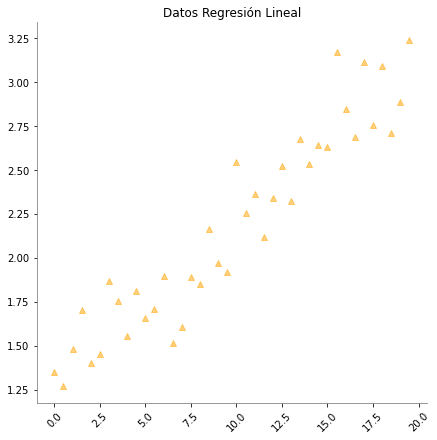

In [3]:
# Se realiza un gráfico de los datos que hemos generado
fig, ax = plt.subplots(figsize = (7,7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.scatter(x,y,label='Data', color = 'orange', marker = '^', alpha = 0.5)
plt.title('Datos Regresión Lineal')
plt.xticks(rotation=45, horizontalalignment="center")


Datos para hacer la regresión lineal: y = 0.1*x + 1.25 + N(0,0.2)

# **Se entrena el modelo de Regresión Lineal**

In [4]:
from sklearn.linear_model import LinearRegression 

regresion_lineal = LinearRegression()

regresion_lineal.fit(x.reshape(-1,1), y)

print('x = '+ str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))


x = [0.09183522], b = 1.2858792525736682


El modelo estima:
                 
                 0.092 en lugar de 0.1 para x

                 1.286 en lugar de 1.25 para b


Esta diferencia se da por el ruido gaussiano aplicado y por la poca cantidad de datos.


# **Se predice el modelo de Regresión Lineal**

Una vez se tiene entrenado el modelo, se pueden realizar predicciones.

Se quiere saber que valor de y corresponde a x = 5

In [5]:
otro_x = np.array([5])
prediccion = regresion_lineal.predict(otro_x.reshape(-1,1))

print('Esta es la predicción para el nuevo valor de x: '+ str(prediccion))

Esta es la predicción para el nuevo valor de x: [1.74505534]


Noten que la estimación de la regresión lineal que se acaba de entrenar para **x = 5** es **y = 1.7450**

Para la evaluación de la calidad del modelo se debe hacer la medición del error cuadrático medio.

# **Error Cuadrático Medio (MSE)**

In [6]:
from sklearn.metrics import mean_squared_error

prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))

print('Raíz del Error Cuadrático Medio (RMSE) = '+ str(rmse))

Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


In [7]:
from sklearn.metrics import mean_squared_error

prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# **Coeficiente de determinación R2**

El coeficiente de determinación R2 determina la calidad del modelo para replicar los resultados, y la proporción de variables de los resultados que pueden explicarse por el modelo. 

El rango de R2 está entre 0 y 1, siendo 1 el mejor. Para medir el coeficiente de determinación R2 de la regresión lineal usaremos el método **score**.

In [8]:
r2 = regresion_lineal.score(x.reshape(-1,1), y)

print('Coeficiente de Determinación R2 = '+ str(r2))

Coeficiente de Determinación R2 = 0.8943593637683117


**Visualización**

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text major ticklabel objects>)

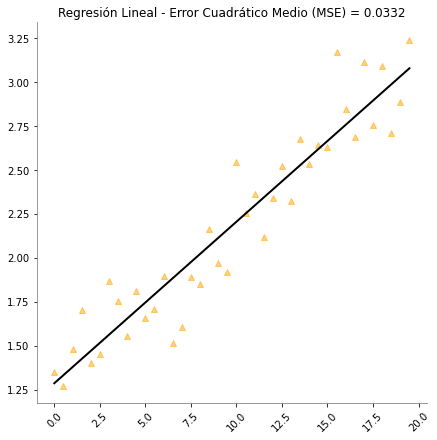

In [9]:
fig, ax = plt.subplots(figsize= (7,7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.scatter(x,y,label='Data', color = 'orange', marker = '^', alpha = 0.5)
plt.plot(x, prediccion_entrenamiento,'k', linewidth=2)
plt.title('Regresión Lineal - Error Cuadrático Medio (MSE) = 0.0332')
plt.xticks(rotation=45, horizontalalignment="center")

# **Regresión Logística**

Es un algoritmo de clasificación. Se utiliza para la detección por ejemplo de problemas de cancer o para calcular la probabilidad de que ocurra un evento.

La regresión logística describe y estima la relación entre una variable binaria dependiente y las variables independientes.

Se puede utilizar para varios problemas de clasificación, como la detección de spam, predicción de diabetes, si un cliente determinado comprará un producto en particular o si se irá con la competencia, estos son algunos ejemplos de aplicación.

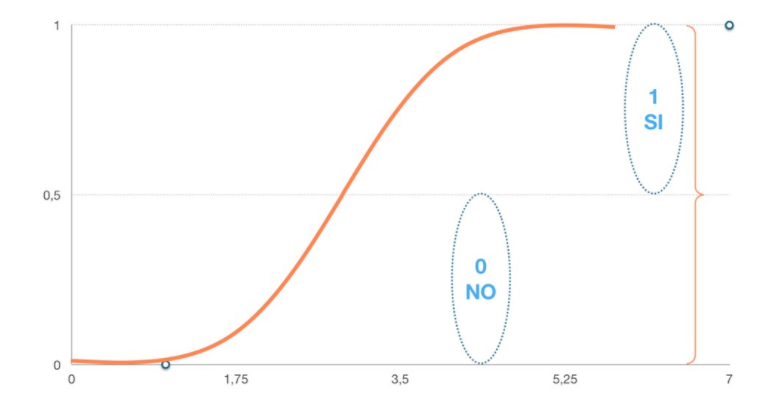

En la curva se identifica, que si va al infinito positivo la predicción se convertirá en 1, y si la curva pasa el infinito negativo la predicción se convertirá en 0.

Si la salida de la función Sigmoide es mayor que 0.5 podemos clasificar el resultado como 1 o SI, y si es menor que 0.5 podemos clasificarlo como 0 o NO.


La ecuación de la función Sigmoide es la siguiente:

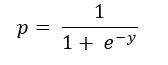

**Tipos de Regresión Logística**

* Regresión Logística Binaria: La variable objetivo tiene sólo dos resultados posibles, llueve o no llueve, sube o baja.
* Regresión Logística Multinomial: La variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.
* Regresión Logística Ordinal: La variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto de 1 a 5.

In [10]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [11]:
# Revisión de información contenida en el dataset
print('Información en el dataset: '+ str(dataset.keys()))

Información en el dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
# Vamos a conocer las características del dataset
print('Características del dataset: '+str(dataset.DESCR))

Características del dataset: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For i

El dataset cuenta con 569 datos y un total de 30 atributos, todos numéricos.

Algunos de los atributos o variables independientes son: el radio, la textura, el perímetro y el área.

Para este caso de aplicación, vamos a predecir si un paciente tiene cáncer o no, y conocer todas las características del tumor para saber si es benigno o maligno.

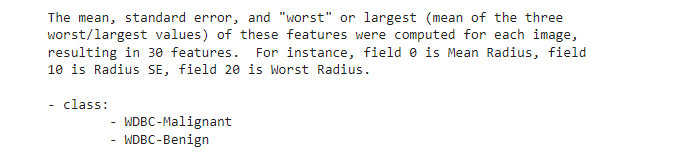

Se puede observar que de cada una de estas variables tenemos la información de la media, el error estándar y el peor, que es la media de los tres valores más grandes.
De igual manera, se identifica que en el dataset no se tiene ningún valor perdido, por lo que se encuentra completo, es decir, no se requiere hacer un preprocesamiento de datos.

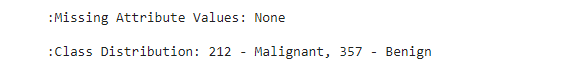

También se puede visualizar que en el dataset, 212 tumores son malignos y 357 son benignos.

Se definen las variables 'X' y 'Y' de trabajo para este modelo.

Para 'X' se va a utilizar todas las variables que se encuentran dentro de 'data'.

In [13]:
# Se seleccionan todas las columnas
X = dataset.data

Luego, 'Y' será igual a los datos de 'target'

In [14]:
# Defino los datos correspondientes a las etiquetas
Y = dataset.target

'Y' sólo cuenta con una columna de 0 y 1, donde 1 indica que el tumor es maligno y 0 que el tumor es benigno.

Ahora se pueden separar los datos de entrenamiento y prueba.

In [15]:
from sklearn.model_selection import train_test_split

Para la segmentación, se tomará el 20% de los datos para prueba, en cuanto se tenga el modelo.

In [16]:
# Se separa el conjunto de entrenamiento como 'train', y los de prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Se debe normalizar o escalar los datos, ya que tienen diferentes magnitudes, unidades y rangos.

In [17]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

In [18]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [19]:
# Defino el algoritmo de trabajo
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [20]:
# Entrenamiento del modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predicción
y_pred = algoritmo.predict(X_test)

In [22]:
# Se imprimen los valores reales con los predichos, encontrando que son iguales, sin embargo, 
# se realiza el cálculo de las métricas
# para verificar el rendimiento del modelo.
print(y_pred)
print(y_test)

[1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1]
[1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0
 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1]


Primero, se realiza el cálculo de la matriz de confusión

In [23]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[36  4]
 [ 2 72]]


La matriz nos muestra que se tienen 36 datos verdaderos positivos, es decir, que en los datos reales eran 1 y el modelo los predijo correctamente.

Por su parte, son 72 los datos verdaderos negativos, es decir, que en los datos reales eran 0 y el modelo los predijo.

Por otro lado, el modelo no predijo correctamente los siguientes valores:
- Falsos negativos: 4, lo que significa que en los datos reales eran 1 y el modelo los predijo como 0.
- Falsos positivos: 2, lo que significa que en los datos reales eran 0 y el modelo los predijo como 1.

La matriz nos muestra que fueron 6 datos los que el modelo no predijo correctamente, sin embargo, con el resto de los datos si lo hizo correctamente.


**Precisión del algoritmo**

In [24]:
# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo: '+ str(precision))

Precisión del modelo: 0.9473684210526315


**Exactitud**

In [25]:
# Se calcula la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo: ' + str(exactitud))

Exactitud del modelo: 0.9473684210526315


**Sensibilidad o recall**

In [26]:
# Se calcula la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo: '+ str(sensibilidad))

Sensibilidad del modelo: 0.972972972972973


**Puntaje F1**

In [27]:
# Se calcula el puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo: '+ str(puntajef1))

Puntaje F1 del modelo: 0.9599999999999999


**Curva ROC**

In [28]:
# Se calcula la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo: '+ str(roc_auc))

Curva ROC - AUC del modelo: 0.9364864864864866


# **Regresión Lineal con valores atípicos**

Un factor que puede afectar la distribución de probabilidad de las variables cuando se usa un modelo de regresión lineal es **La presencia de valores atípicos.** Estos valores atípicos, son muestras que se encuentran muy por fuera de la distribución esperada.

Estos valores pueden afectar el modelo, ya que pueden disminuir su rendimiento y pueden generar modelos sesgados debido a estos valores atípicos.

Para evitar que esto suceda, se tiene una familia de modelos de regresión robusta, estos son conocidos como **algoritmos de regresión robustos**. Los más utilizados son la regresión de consenso de muestra aleatoria (RANSAC) y la regresión de Huber.

**Aplicación**

Para el siguiente caso de aplicación se utiliza un dataset de la librería de sklearn.

Nuestro conjunto de datos consistirá en una variable dependiente (Y) y una variable independiente (X) con 1000 observaciones de los cuales 50 corresponden a valores atípicos.

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [30]:
n_samples = 1000
n_outliers = 50
X,Y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

In [31]:
print(coef)

82.1903908407869


In [32]:
# Adición de valores atípicos a los datos
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
Y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
print('La variable independiente X tiene {} observaciones/muestras'.format(X.shape[0]))
print('La variable dependiente Y tiene forma {} '.format(Y.shape))

La variable independiente X tiene 1000 observaciones/muestras
La variable dependiente Y tiene forma (1000,) 


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Text major ticklabel objects>)

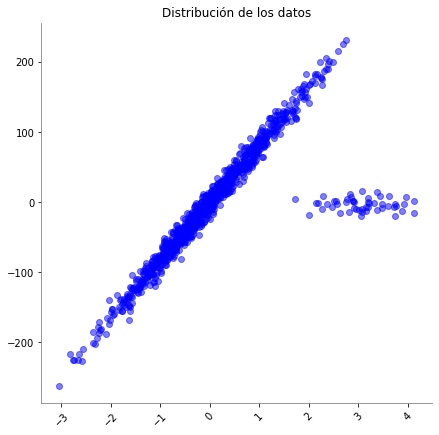

In [33]:
fig, ax = plt.subplots(figsize = (7,7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.scatter(X,Y,label='Data', color = 'blue', marker = 'o', alpha = 0.5)
plt.title('Distribución de los datos')
plt.xticks(rotation=45, horizontalalignment="center")

**Ajuste del modelo**

A continuación, se realizará el ajuste de un modelo de regresión regular y un modelo robusto a los datos y verificamos los coeficientes de regresión estimados.

In [34]:
# Ajuste utilizando todos los datos
lr = linear_model.LinearRegression()
lr.fit(X, Y)

# Ajuste del modelo lineal con el algoritmo RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X, Y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Se predicen los datos de los modelos estimados
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Se comparan los coeficientes estimados
print('Coeficientes estimados (true, Regresión Lineal, RANSAC): ' + str(coef)+', '+ str(lr.coef_)+ ', '+ str(ransac.estimator_.coef_))
#print(coef, lr.coef_, ransac.estimator_.coef_)

Coeficientes estimados (true, Regresión Lineal, RANSAC): 82.1903908407869, [54.17236387], [82.08533159]


**Visualización**

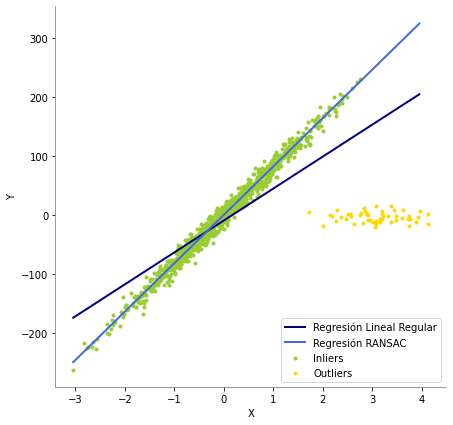

In [35]:
fig, ax = plt.subplots(figsize = (7,7))

plt.scatter(X[inlier_mask], Y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], Y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=2, label='Regresión Lineal Regular')
plt.plot(line_X, line_y_ransac, color='royalblue', linewidth=2, label='Regresión RANSAC')
plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("Y")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.show()